**Grupo 2**

**Esteban Neira Mejía - 1010010026**

**Mateo Cardona - 1193460101**

**Juan Diego Castaño -1002634927**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importación de librerías

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras import layers,models,optimizers

El siguiente conjunto de datos ha sido obtenido por una compañía de energía que tiene un generador al cual se le han extraído los siguientes atributos:

* Temperatura ambiente (AT)
* Vacío en el Exhosto (V)
* Presión Ambiente (AP)
* Humedad Relativa (RH)

La última columna es la Potencia obtenida (PE) por el generador con los atributos mencionados

## Descripción de la Base de Datos

In [ ]:
# Importamos el conjunto de datos

dataSet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje de Máquina/Datos/datos_energia.csv')
dataSet

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


<Axes: >

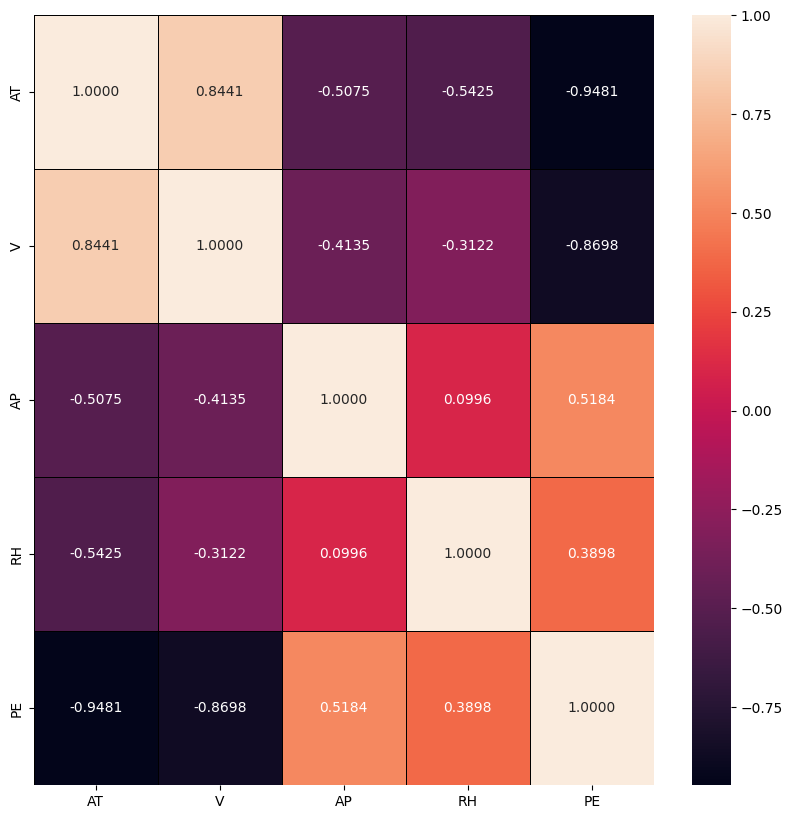

In [ ]:
# Realizamos un mapa de calor con las correlaciones de las variables para determinar con cuales es mejor trabajar.

f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(dataSet.corr(), annot=True, linewidths=0.5, linecolor= 'black', fmt= '.4f', ax= ax)

Las variables Temperatura Ambiente (AT) y Vacío en el Exhosto (V) son las que mejor se relacionan con la variable a predecir Potencia Obtenida (PE)

In [ ]:
# se toman las 2 primeras columnas como las variables de entrada X
X = dataSet.iloc[:, 0:2].values

# se toma la última columna como la variable de salida y
y = dataSet.iloc[:,-1].values

Text(0, 0.5, 'Potencia Obtenida')

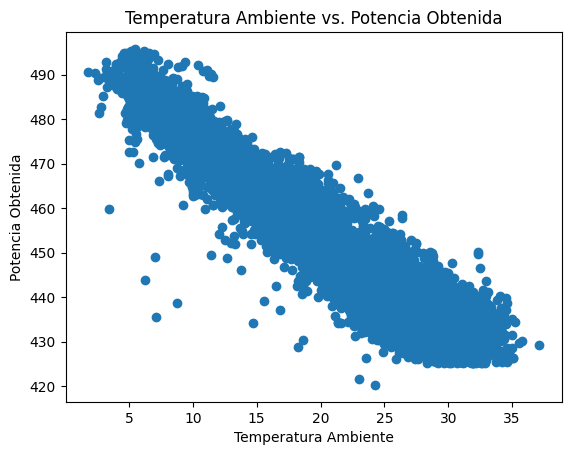

In [ ]:
plt.scatter(X[:,0],y)
plt.title('Temperatura Ambiente vs. Potencia Obtenida')
plt.xlabel('Temperatura Ambiente')
plt.ylabel('Potencia Obtenida')

Text(0, 0.5, 'Potencia Obtenida')

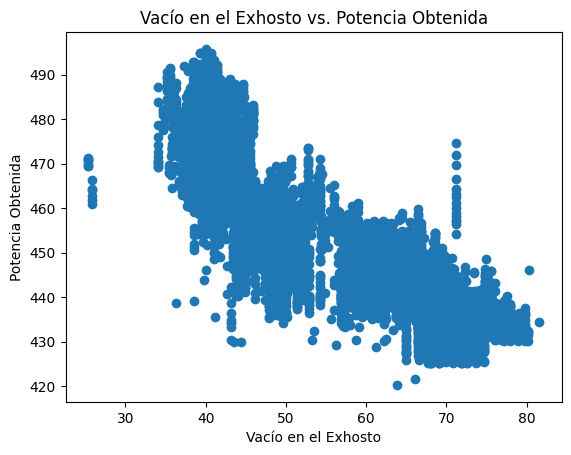

In [ ]:
plt.scatter(X[:,1],y)
plt.title('Vacío en el Exhosto vs. Potencia Obtenida')
plt.xlabel('Vacío en el Exhosto')
plt.ylabel('Potencia Obtenida')

In [ ]:
# Usamos la librería train_test_split de scikit learn para realizar la partición de los datos en datos de entrenamiento
# y datos de prueba; se usa el 80% de los datos para entrenamiento y el 20% restante para prueba

from sklearn.model_selection import train_test_split
[X_train,X_test,y_train,y_test] = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train.shape)
print(y_train.shape)

# Los datos de entrada (X_train) son 7654 ejemplares con 2 entradas para cada neurona

(7654, 2)
(7654,)


In [ ]:
# Usamos la librería StandardScaler para realizar una normalización de los datos, con el objetivo de facilitar el trabajo de la Red.
# La normalización consiste en restar cada dato por la media de todos y dividirlo entre la desviación estandar de todos.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Regresión Lineal usando Scikit Learn

Vamos a hacer una regresión lineal usando las librerías de scikit Learn para tratar de comparar los resultados con los obtenidos en una regresión usando una red neuronal, y así comparar cuál se adapta mejor a los datos.

In [ ]:
# Para una regresión lineal con la librería LinearRegression de Scikit Learn no es necesario realizar el escalamiento de variables.
# Se pasa directamente a entrenar el modelo.

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_sc, y_train)

LinearRegression()

In [ ]:
# Predecir con los datos de prueba
# Usamos los datos de prueba para generar la predicción
y_pred = lr.predict(X_test_sc)
print(y_pred)

[431.3059015  459.66930773 466.17078381 ... 470.03631172 443.50414918
 463.09465765]


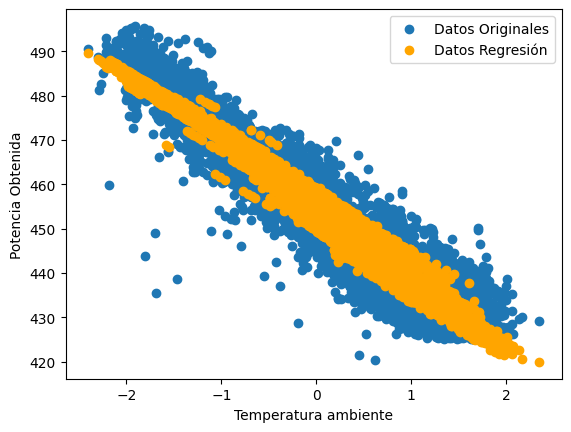

In [ ]:
plt.scatter(X_train_sc[:,0], y_train, label='Datos Originales')
plt.scatter(X_train_sc[:,0], lr.predict(X_train_sc), color='orange', label='Datos Regresión')
plt.xlabel('Temperatura ambiente')
plt.ylabel('Potencia Obtenida')
plt.legend(loc='upper right')

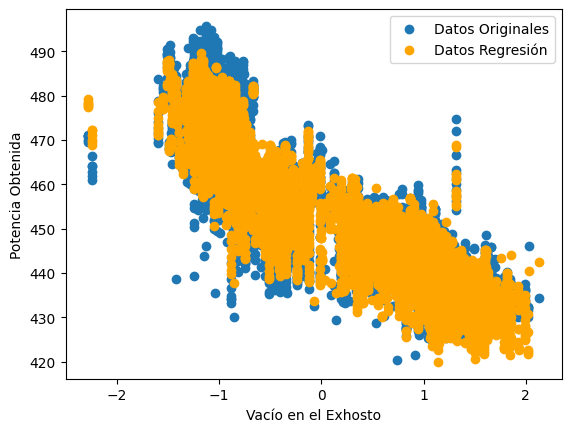

In [ ]:
plt.scatter(X_train_sc[:,1], y_train, label='Datos Originales')
plt.scatter(X_train_sc[:,1], lr.predict(X_train_sc), color='orange', label='Datos Regresión')
plt.xlabel('Vacío en el Exhosto')
plt.ylabel('Potencia Obtenida')
plt.legend(loc='upper right')

In [ ]:
# Veamos el desempeño usando MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sck_mae = mean_absolute_error(y_test,y_pred)
sck_mse = mean_squared_error(y_test,y_pred)
print('Mean Absolute Error: ',sck_mae)
print('Mean Squared Error: ',sck_mse)

Mean Absolute Error:  3.854553363596842
Mean Squared Error:  23.509708220779952


## Regresión Usando Redes Neuronales

In [ ]:
def build_model_regression(lr,input_data):
    model=models.Sequential()
    model.add(layers.Dense(32,activation="tanh",input_shape=(input_data,))) ## SIEMPRE MIRAR LA SEGUNDA DIMENSION
    model.add(layers.Dense(16))
    model.add(layers.Dense(1)) ## COMO ES LINEAL LA SALIDA NO NECESITO PONERLE UNA CAPA DE ACTIVACIÓN
    model.compile(optimizer=optimizers.Adam(learning_rate=lr),loss="mse",metrics=["mae"])
    return model
### PARA REGRESION SE USA LOSS="MSE" Y METRICS = "MAE"

In [ ]:
## 3 SETS DE VALIDACIONES

k=3
#num_val_samples=len(X_train_sc)//k
num_epoch=200
all_history=[]

In [ ]:
for i in range(k):
    print("Fold:",i)
    #val_data=X_train_sc[i*num_val_samples:(i+1)*num_val_samples]
    #val_targets=y_train[i*num_val_samples:(i+1)*num_val_samples]

    #partial_train_data=np.concatenate([X_train_sc[:i*num_val_samples],X_train_sc[(i+1)*num_val_samples:]],axis=0)
    #partial_train_targets=np.concatenate([y_train[:i*num_val_samples],y_train[(i+1)*num_val_samples:]],axis=0)
    
    model=build_model_regression(0.001,2)
    history=model.fit(X_train_sc,y_train,epochs=num_epoch,batch_size=16,validation_data=(X_test_sc,y_test),verbose=0)
    all_history.append(history.history["val_mae"])


Fold: 0
Fold: 1
Fold: 2


In [ ]:
pd.DataFrame(all_history)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,347.487030,50.388844,4.249632,4.152283,4.117925,4.109102,4.084915,4.091071,4.054810,4.097986,...,4.026144,4.220204,4.015887,3.997416,4.016085,3.986354,4.173774,4.162652,3.996237,4.251596
1,355.656189,54.751839,4.249947,4.152985,4.153696,4.133882,4.099996,4.088968,4.092443,4.086956,...,4.057693,4.027407,4.036689,4.113933,4.176065,4.380278,4.037550,4.023594,4.527753,4.012537
2,351.149750,52.946117,4.140613,4.062632,4.050222,4.072825,4.029056,4.018708,4.003547,4.012696,...,4.070797,3.933958,3.970238,4.150737,3.932661,4.008414,4.095311,3.964848,3.991025,4.000585
3,184.155991,4.297523,4.014887,4.013119,4.023276,3.962594,3.948812,3.948474,3.982831,3.977501,...,3.965620,4.084062,3.892004,3.877482,4.102534,3.949970,3.889338,3.882422,4.043257,4.007660
4,184.397125,4.174511,4.094234,4.065192,4.040157,4.043767,3.992547,3.976323,3.994951,4.038900,...,3.982338,3.992667,4.153619,3.946957,3.957140,3.889250,4.102223,3.946520,3.959557,4.094543
5,195.561127,4.100670,4.038702,4.001940,4.000525,3.969356,3.968210,3.969316,3.973645,4.014588,...,4.217097,3.897136,3.925187,3.954686,3.981946,3.927838,4.166172,3.955440,3.948301,3.902055


In [ ]:
### TOMAREMOS TODOS LOS ERRORES DE NUESTRAS 3 ITERACIONES DE MODELOS Y LOS PROMEDIAMOS:

all_mea_avg=pd.DataFrame(all_history).mean(axis=0)
all_mea_avg

0      269.734535
1       28.443250
2        4.131336
3        4.074692
4        4.064300
          ...    
195      4.023684
196      4.077395
197      3.989246
198      4.077688
199      4.044829
Length: 200, dtype: float64

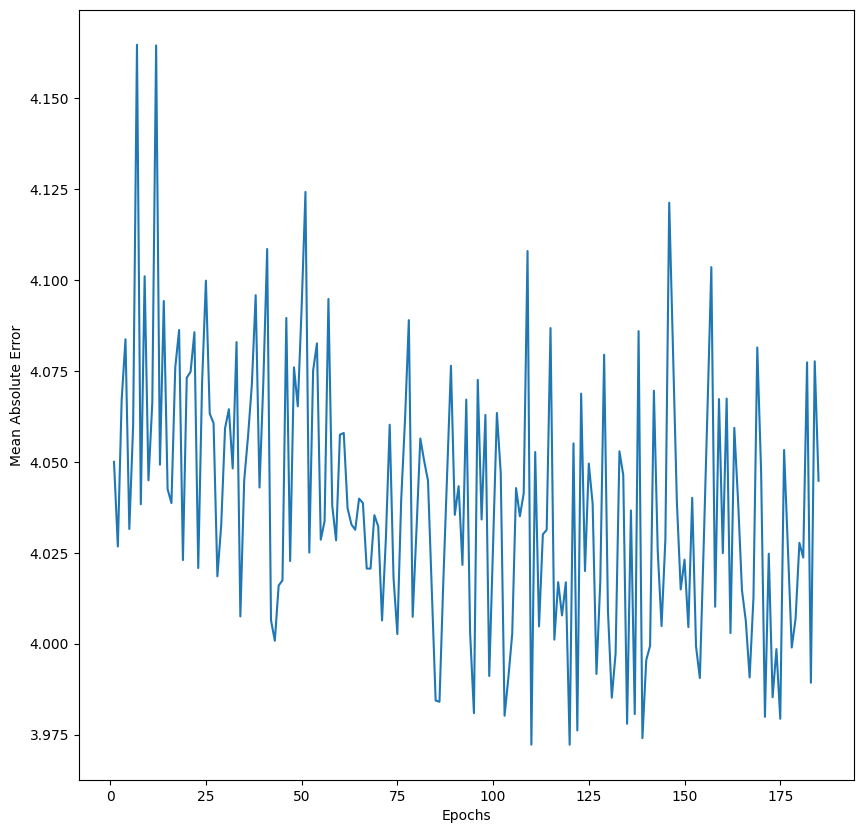

In [ ]:
fig=plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mea_avg[15:])+1),all_mea_avg[15:])
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
neuron_eval = model.evaluate(X_test_sc,y_test)
print(neuron_eval)

60/60 [==============================] - 0s 960us/step - loss: 24.3476 - mae: 3.9021
[24.34756851196289, 3.9020538330078125]


In [ ]:
new_pred = ([[1,2]])
model.predict(new_pred)

1/1 [==============================] - 0s 61ms/step


array([[431.32288]], dtype=float32)

In [ ]:
pred = model.predict(X_train_sc)

240/240 [==============================] - 0s 831us/step


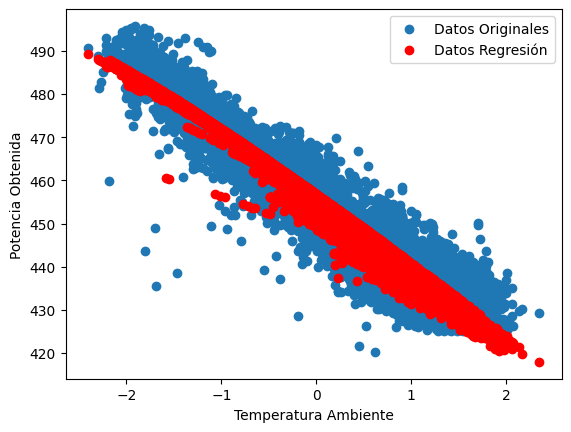

In [ ]:
plt.scatter(X_train_sc[:,0],y_train, label='Datos Originales')
plt.scatter(X_train_sc[:,0],pred,color='r', label='Datos Regresión')
plt.xlabel('Temperatura Ambiente')
plt.ylabel('Potencia Obtenida')
plt.legend(loc='upper right')

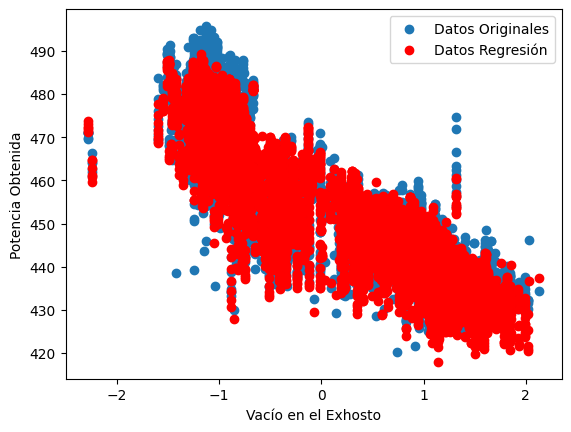

In [ ]:
plt.scatter(X_train_sc[:,1],y_train, label='Datos Originales')
plt.scatter(X_train_sc[:,1],pred,color='r', label='Datos Regresión')
plt.xlabel('Vacío en el Exhosto')
plt.ylabel('Potencia Obtenida')
plt.legend(loc='upper right')

## Comparación

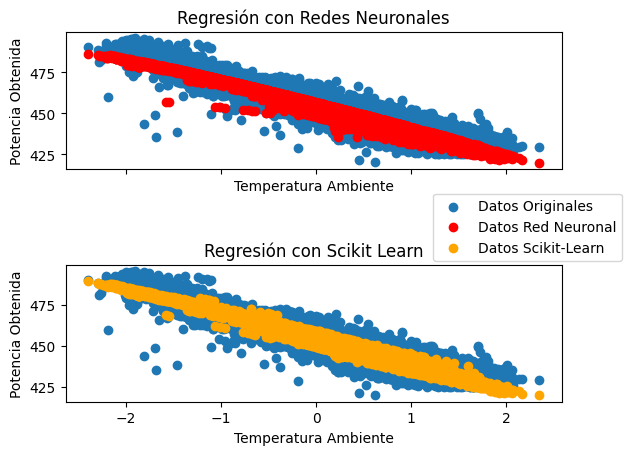

In [ ]:
# Graficamos la primera variable (Temperatura ambiente)

fig, (ax1, ax2) = plt.subplots(2,sharex='col')
fig.subplots_adjust(hspace=0.7, wspace=0.7)

ax1.scatter(X_train_sc[:,0],y_train, label='Datos Originales')
ax1.scatter(X_train_sc[:,0],pred,color='r', label='Datos Red Neuronal')

ax2.scatter(X_train_sc[:,0],y_train)
ax2.scatter(X_train_sc[:,0], lr.predict(X_train_sc), color='orange', label='Datos Scikit-Learn')

ax1.set_title('Regresión con Redes Neuronales')
ax1.set(xlabel='Temperatura Ambiente',ylabel='Potencia Obtenida')

ax2.set_title('Regresión con Scikit Learn')
ax2.set(xlabel='Temperatura Ambiente',ylabel='Potencia Obtenida')

fig.legend(loc='right')
fig.show()

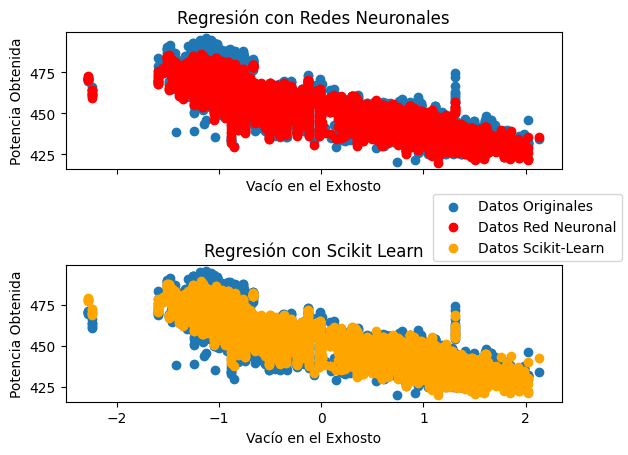

In [ ]:
# Graficamos la segunda variable (Vacío en el Exhosto)

fig, (ax1, ax2) = plt.subplots(2,sharex='col')
fig.subplots_adjust(hspace=0.7, wspace=0.7)

ax1.scatter(X_train_sc[:,1],y_train, label='Datos Originales')
ax1.scatter(X_train_sc[:,1],pred,color='r', label='Datos Red Neuronal')

ax2.scatter(X_train_sc[:,1],y_train)
ax2.scatter(X_train_sc[:,1], lr.predict(X_train_sc), color='orange', label='Datos Scikit-Learn')

ax1.set_title('Regresión con Redes Neuronales')
ax1.set(xlabel='Vacío en el Exhosto',ylabel='Potencia Obtenida')

ax2.set_title('Regresión con Scikit Learn')
ax2.set(xlabel='Vacío en el Exhosto',ylabel='Potencia Obtenida')

fig.legend(loc='right')
fig.show()

In [ ]:
# Los MAE
print('El error absoluto medio usando Scikit Learn es:', sck_mae)
print('El error absoluto medio usando redes neuronales es: ', neuron_eval[1])

print('\n')
# Los MSE

print('El error cuadrático medio usando Scikit Learn es: ', sck_mse)
print('El error cuadrático medio usando redes neuronales es: ', neuron_eval[0])

El error absoluto medio usando Scikit Learn es: 3.854553363596842
El error absoluto medio usando redes neuronales es:  3.972917318344116


El error cuadrático medio usando Scikit Learn es:  23.509708220779952
El error cuadrático medio usando redes neuronales es:  24.87359619140625


Al hacer una regresión lineal usando la librería Scikit Learn basada en Machine Learning y compararla con un módelo de regresión por medio de Redes Neuronales (Deep Learning), vemos que los resultados obtenidos son muy similares:
 
* La comparación gráfica nos permite apreciar que los datos de predicción en ambas variables se ajusten correctamente a los datos originales. 
* De igual forma la métrica MAE (Mean Absolute Error) tiene una diferencia ligera. 
* La métrica MSE (Mean Squared Error) tiene una diferencia ligera. 

Esto nos indica que la regresión por Redes Neuronales tiene ligeramente mejor desempeño que la implementada por Scikit Learn